### **In this part we performs basic Exploratory Data Analysis (EDA) on the chosen dataset. It includes data loading, cleaning, visualization, and summary statistics to understand the underlying patterns and relationships within the data.**
---

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np



PATH_TO_DATA = "../csv_exports/"

### Step 1: Data loading

Initialize dataframe on main dataset. Using flag `low_memory = False` not to limit memory usage.


Lets add item dataset as df_items.

In [190]:
df_items = pd.read_csv(PATH_TO_DATA + "item_full_export.csv", low_memory=False)
df_items

,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,avg_price,id,market_hash_name,price,classid,real_instance,old_price,base_id,phase,paintindex,type
0,519977179,39930988695,2024-10-30 12:25:35,NaN,NaN,NaN,100.0,1.05,5834343262,Gallery Case,1142.0,6210134332,519977179,9957.0,102931,NaN,NaN,NaN
1,519977179,40029344627,2024-10-30 12:25:44,NaN,NaN,NaN,75.0,1.05,5841584679,Gallery Case,1132.0,6221969194,519977179,0.0,102931,NaN,NaN,NaN
2,1363818008,40006314348,2024-10-30 11:45:27,NaN,NaN,NaN,80.0,0.18,5842053831,Sticker | XD,509.0,6220225546,1363818008,2000.0,104051,NaN,NaN,NaN
3,519977179,0,2024-10-30 12:26:00,NaN,NaN,NaN,95.0,0.60,5845326887,Charm | Hot Sauce,1661.0,6216346866,519977179,16000.0,0,NaN,NaN,NaN
4,519977179,40050526339,2024-10-30 11:55:13,NaN,NaN,NaN,85.0,1.05,5845599583,Gallery Case,4000.0,6223834294,519977179,0.0,102931,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742723,188530139,39926945274,2024-10-30 12:31:26,NaN,NaN,NaN,90.0,0.03,5858890191,Sticker | Grayhound Gaming | Paris 2023,6.0,5327976116,188530139,0.0,95075,NaN,NaN,Sticker
742724,188530170,40119424451,2024-10-30 12:31:31,NaN,NaN,NaN,80.0,19.72,5858890199,StatTrak™ AWP | Chromatic Aberration (Field-Te...,16519.0,6233185448,188530170,0.0,91189,NaN,NaN,Sniper Rifle
742725,188530139,39946422479,2024-10-30 12:31:31,NaN,NaN,NaN,85.0,7.00,5858890207,M4A4 | Temukau (Battle-Scarred),7741.0,5199671607,188530139,0.0,94795,NaN,NaN,Rifle
742726,188530139,39926953102,2024-10-30 12:31:31,NaN,NaN,NaN,90.0,0.03,5858890223,Sticker | Spinx | Copenhagen 2024,6.0,5799819753,188530139,0.0,100014,NaN,NaN,Sticker


The initial dimensionality of the created dataframe is 742728 rows x 18 columns.



The price in the dataset is in (dollar+cents)*1000. Lets "standartize" it to just dollar+cents to match the avg_price format.

In [191]:
df_items['price'] = df_items["price"]/1000


### Step 2: Gather basic info on the dataset

In [192]:
# Display basic information about the dataset
df_items.info()

# Display summary statistics for numerical columns
df_items.describe()

# Display the number of unique values in each column
df_items.nunique()

# Display the number of missing values in each column
df_items.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742728 entries, 0 to 742727
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   instanceid          742728 non-null  int64  
 1   asset               742728 non-null  int64  
 2   stamp               742728 non-null  object 
 3   float               350528 non-null  float64
 4   paintseed           343190 non-null  float64
 5   stickers            118483 non-null  object 
 6   chance_to_transfer  742728 non-null  float64
 7   avg_price           742728 non-null  float64
 8   id                  742728 non-null  int64  
 9   market_hash_name    742728 non-null  object 
 10  price               742728 non-null  float64
 11  classid             742728 non-null  int64  
 12  real_instance       742728 non-null  int64  
 13  old_price           742728 non-null  float64
 14  base_id             742728 non-null  int64  
 15  phase               1243 non-null 

instanceid                 0
asset                      0
stamp                      0
float                 392200
paintseed             399538
stickers              624245
chance_to_transfer         0
avg_price                  0
id                         0
market_hash_name           0
price                      0
classid                    0
real_instance              0
old_price                  0
base_id                    0
phase                 741485
paintindex            397736
type                    6909
dtype: int64

### Step 3: Check for duplicates

The data gathered was loaded from the db with id as a pk with a unique constraint so no duplitates are possibe. Nevertheless, lets check the uniqueness of each field.


In [193]:
# Check for duplicate rows in the dataset
duplicate_rows = df_items[df_items.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows if any
if duplicate_rows.shape[0] > 0:
    display(duplicate_rows)

unique_counts = df_items.nunique()
print("Number of unique values in each column:")
print(unique_counts)

if df_items['id'].is_unique:
    print("The 'id' field is unique.")
else:
    print("The 'id' field is not unique.")

Number of duplicate rows: 0
Number of unique values in each column:
instanceid              9422
asset                 661384
stamp                   6286
float                 344753
paintseed               1000
stickers               60253
chance_to_transfer        94
avg_price               4970
id                    742728
market_hash_name       19280
price                  36077
classid               220667
real_instance           9418
old_price              46889
base_id                 8985
phase                      8
paintindex              1162
type                      22
dtype: int64
The 'id' field is unique.


### Step 4: Assessment of data gaps

In [194]:
# Определение столбцов с пропущенными значениями
missing_values = df_items.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(df_items)) * 100

# Создание DataFrame для удобного отображения
missing_data_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

# Сортировка по количеству пропущенных значений
missing_data_df = missing_data_df.sort_values(by='Missing Values', ascending=False)

missing_data_df

,Missing Values,Percentage
phase,741485,99.832644
stickers,624245,84.047592
paintseed,399538,53.793313
paintindex,397736,53.550694
float,392200,52.805334
type,6909,0.930219


### Step 5: Proccessing of data gaps

As we saw in the previous output, some items lack values for avg_price or float, marked as NaN or zeros. This data is not useful for us, so let's remove it.

In [195]:
df_items.dropna(subset=["float", "avg_price"], inplace = True)
df_items = df_items[(df_items["float"] != 0) & (df_items["avg_price"] != 0)]
df_items

,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,avg_price,id,market_hash_name,price,classid,real_instance,old_price,base_id,phase,paintindex,type
25,188530139,40110184847,2024-10-30 12:26:47,0.217917,746.0,18269360690|9151142199|18271767885|18384359800,70.00,2.31,5855908503,Souvenir AUG | Sand Storm (Field-Tested),2.387,6231957513,188530139,0.0,86838,NaN,823.0,Rifle
27,902658099,34959445177,2024-10-30 12:26:47,0.127193,490.0,12750092503,95.00,5.81,5855908607,StatTrak™ M4A1-S | Flashback (Minimal Wear),5.832,5271586485,902658099,0.0,2821,NaN,631.0,Rifle
32,188530139,40110231107,2024-10-30 12:26:47,0.189969,483.0,NaN,70.00,2.31,5855908703,Souvenir AUG | Sand Storm (Field-Tested),2.387,6233059031,188530139,0.0,86838,NaN,823.0,Rifle
33,480085569,40099804104,2024-10-30 11:55:48,0.064586,311.0,2128113150|28004,95.00,8.87,5855908711,AWP | Mortis (Factory New),6.925,6231441329,480085569,7024.0,4324,NaN,691.0,Sniper Rifle
39,188530139,40099824882,2024-10-30 12:00:28,0.329627,295.0,NaN,95.00,4.74,5855908831,Glock-18 | Water Elemental (Field-Tested),3.894,6231394836,188530139,3888.0,572,NaN,353.0,Pistol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742442,188530139,39973939160,2024-10-30 12:31:20,0.133974,70.0,NaN,65.00,0.18,5858887807,MAG-7 | Popdog (Minimal Wear),0.135,3574239028,188530139,0.0,79395,NaN,909.0,Shotgun
742444,188530139,40116327296,2024-10-30 12:31:08,0.162955,656.0,NaN,85.00,7.63,5858887823,FAMAS | Commemoration (Field-Tested),8.508,6233179830,188530139,0.0,79441,NaN,919.0,Rifle
742445,188530170,40056107643,2024-10-30 12:31:24,0.197408,827.0,1827462841,100.00,2.08,5858887831,StatTrak™ USP-S | Torque (Field-Tested),3.090,3212609466,188530170,0.0,1017,NaN,489.0,Pistol
742446,302028390,40075093234,2024-10-30 12:31:27,0.091549,207.0,NaN,100.00,0.03,5858887839,Nova | Mandrel (Minimal Wear),0.040,6227543983,302028390,0.0,76151,NaN,785.0,Shotgun


Nice! Now we have 343,201 rows × 18 columns. Lets move on with further cleanup!

### Step 6: Data Distribution Analysis

Lets analyze the distribution of numerical columns using histograms and box plots.

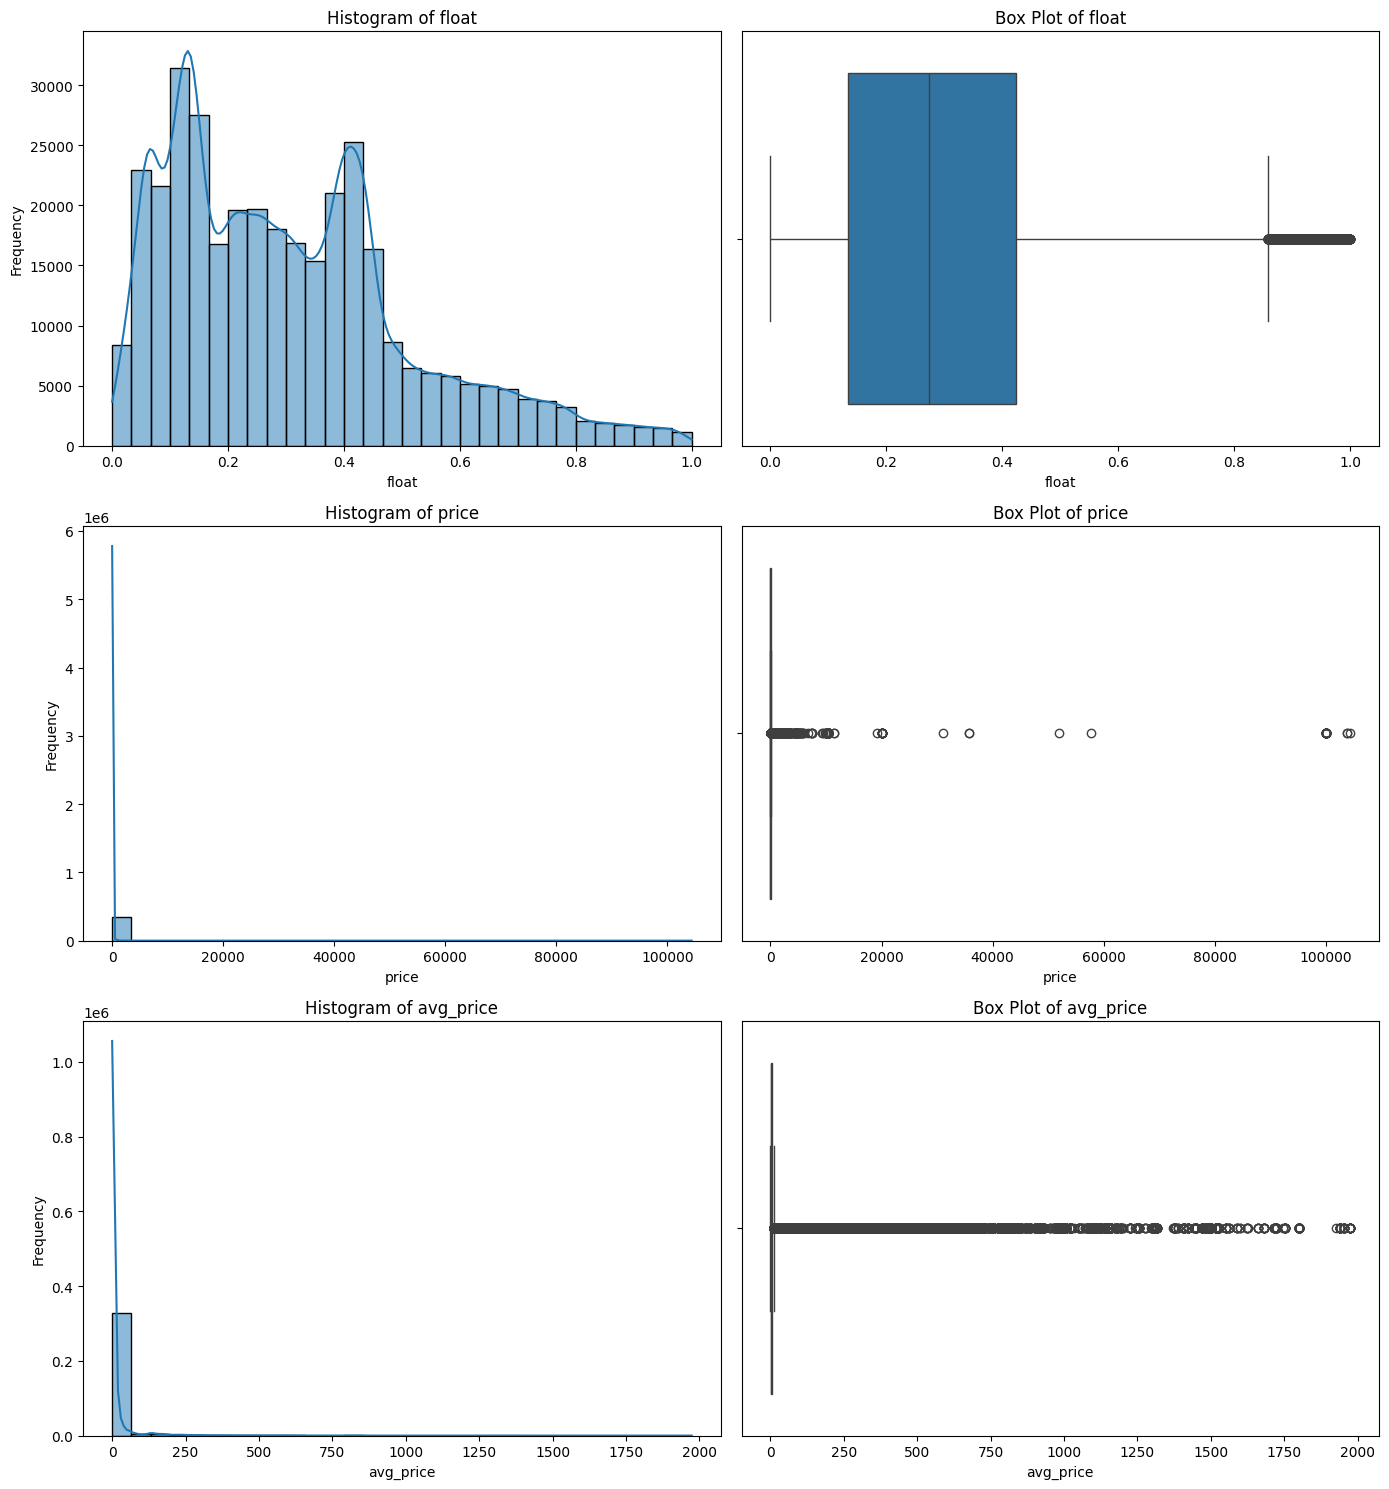

In [196]:
numerical_columns = ['float', 'price', 'avg_price']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(14, 5 * len(numerical_columns)))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df_items[column], bins=30, kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of {column}')
    axes[2*i].set_xlabel(column)
    axes[2*i].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df_items[column], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box Plot of {column}')
    axes[2*i + 1].set_xlabel(column)

plt.tight_layout()
plt.show()

Some of the plots are poorly descriptive, so lets change the scope to show prices thath only <= the mean value of the `price` field.

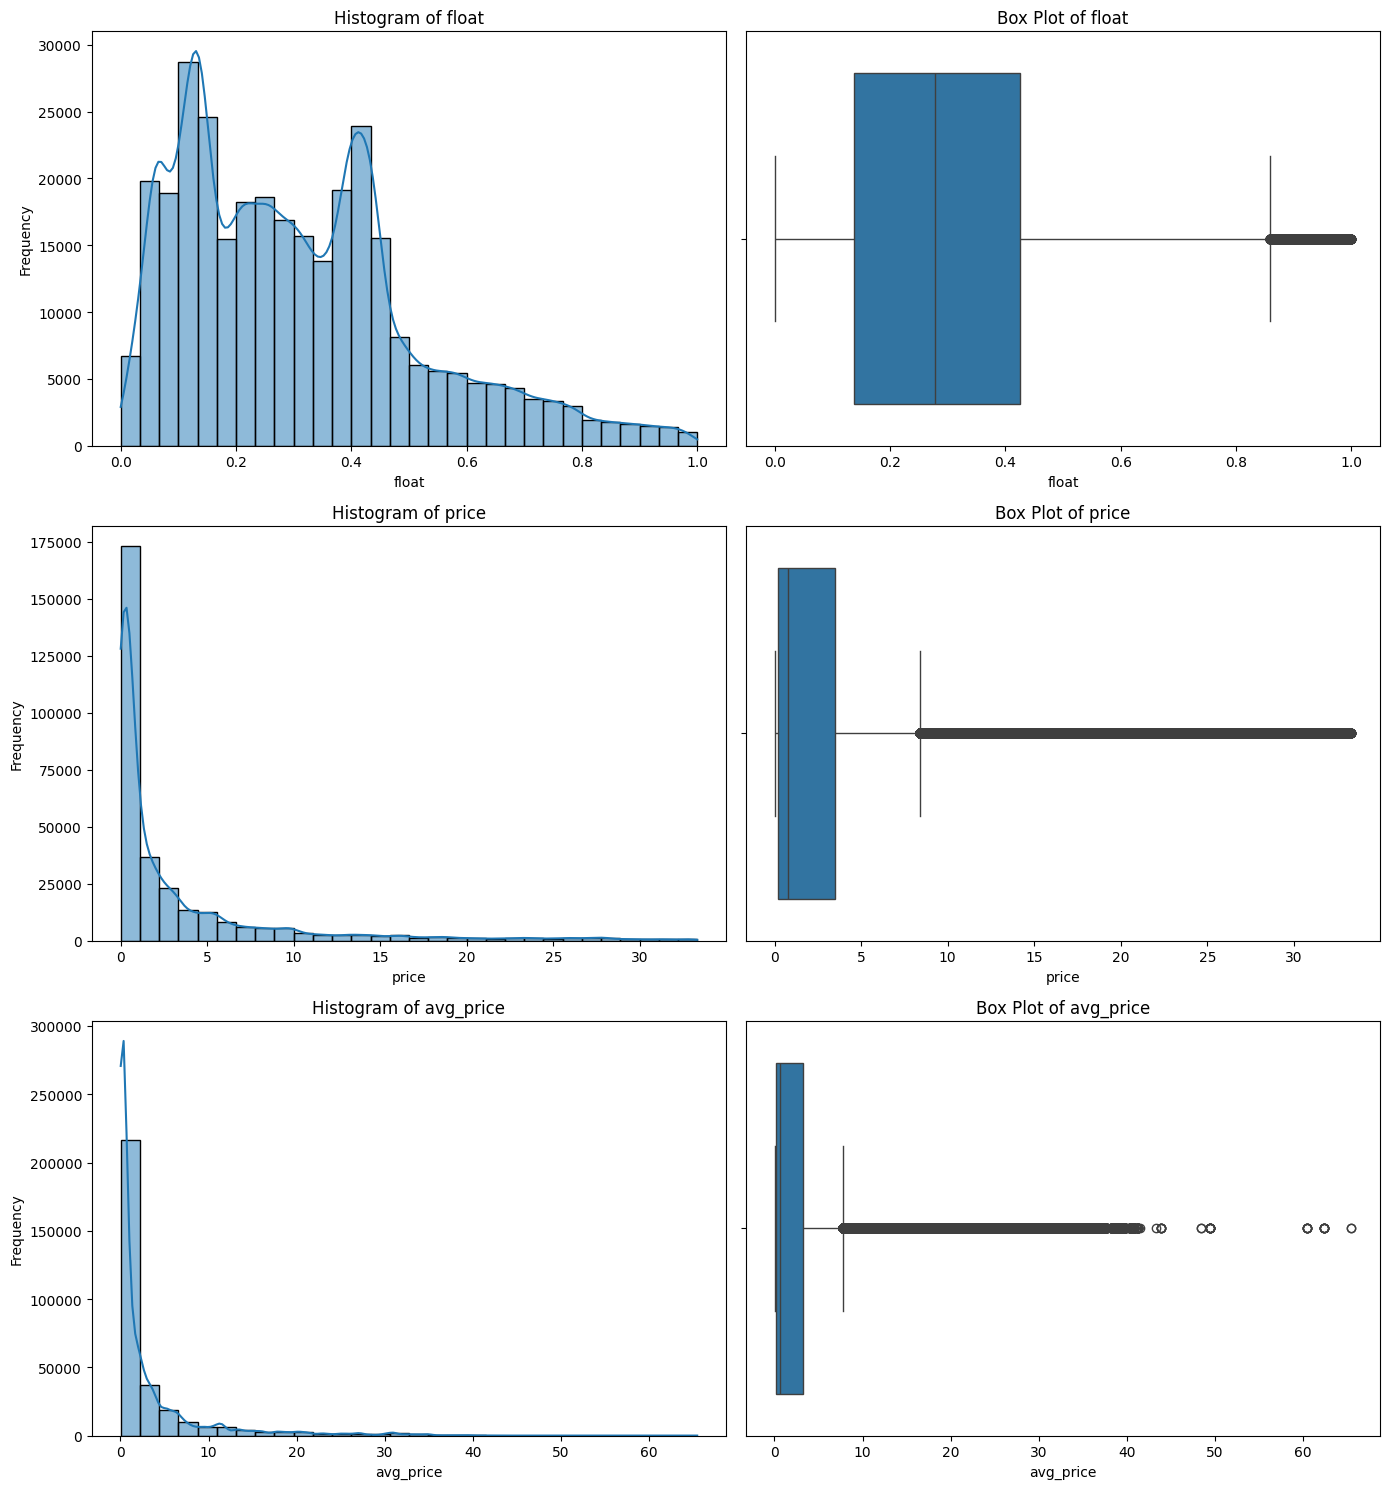

In [197]:


df_items_filtered = df_items.copy()

df_items_filtered = df_items_filtered[df_items_filtered['price'] <= df_items_filtered['price'].mean()]

numerical_columns = ['float', 'price', 'avg_price']

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(14, 5 * len(numerical_columns)))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df_items_filtered[column], bins=30, kde=True, ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of {column}')
    axes[2*i].set_xlabel(column)
    axes[2*i].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df_items_filtered[column], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Box Plot of {column}')
    axes[2*i + 1].set_xlabel(column)

plt.tight_layout()
plt.show()


1. **`float`**: Primarily distributed between 0 and 0.5, with a few high-value outliers. The distribution is slightly bimodal with peaks around 0.1 and 0.3.

2. **`price`**: Highly right-skewed, with most values near zero and many high-value outliers. This indicates a few items with very high prices compared to the majority.

3. **`avg_price`**: Similar to `price`, this column is right-skewed, concentrated at low values, and has a large number of high-value outliers.

**Overall**: `price` and `avg_price` are dominated by low values with rare, extreme outliers. The `float` data shows more balance but still has high-value outliers.

### Step 7: Assessment of Catergorical features

Frequency distribution for type:
type
Pistol          119531
Rifle            96781
SMG              51719
Sniper Rifle     34520
Shotgun          22703
Knife             8549
Machinegun        7407
Gloves            1987
Sticker              2
Graffiti             2
Name: count, dtype: int64


Frequency distribution for market_hash_name:
market_hash_name
AK-47 | Slate (Field-Tested)                         1964
AK-47 | Safari Mesh (Field-Tested)                   1879
P250 | Cassette (Field-Tested)                       1795
Glock-18 | High Beam (Factory New)                   1211
M4A1-S | Emphorosaur-S (Field-Tested)                1183
                                                     ... 
G3SG1 | Contractor (Battle-Scarred)                     1
Souvenir FAMAS | Waters of Nephthys (Factory New)       1
★ Huntsman Knife | Autotronic (Well-Worn)               1
★ Karambit | Stained (Minimal Wear)                     1
★ Flip Knife | Ultraviolet (Minimal Wear)               1
Name

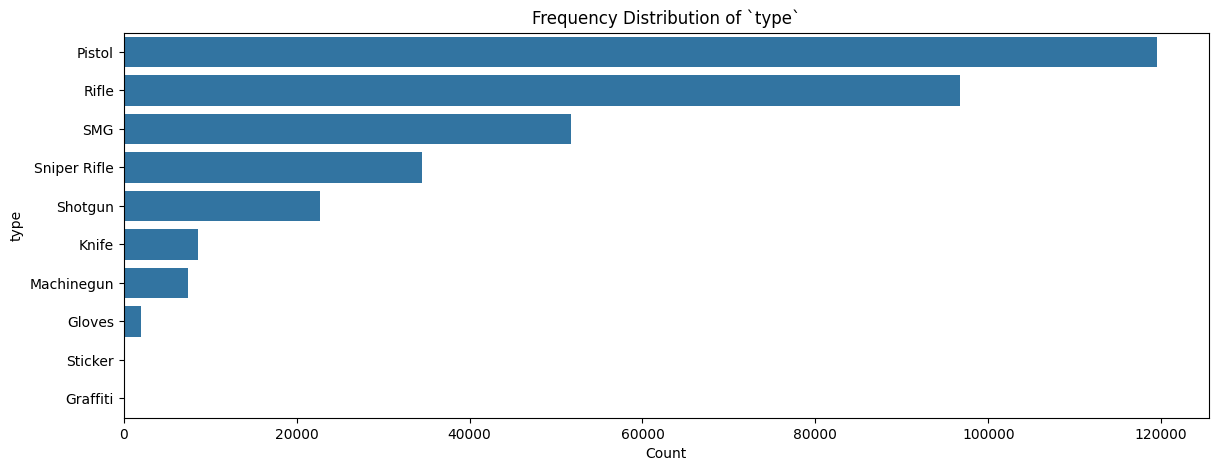

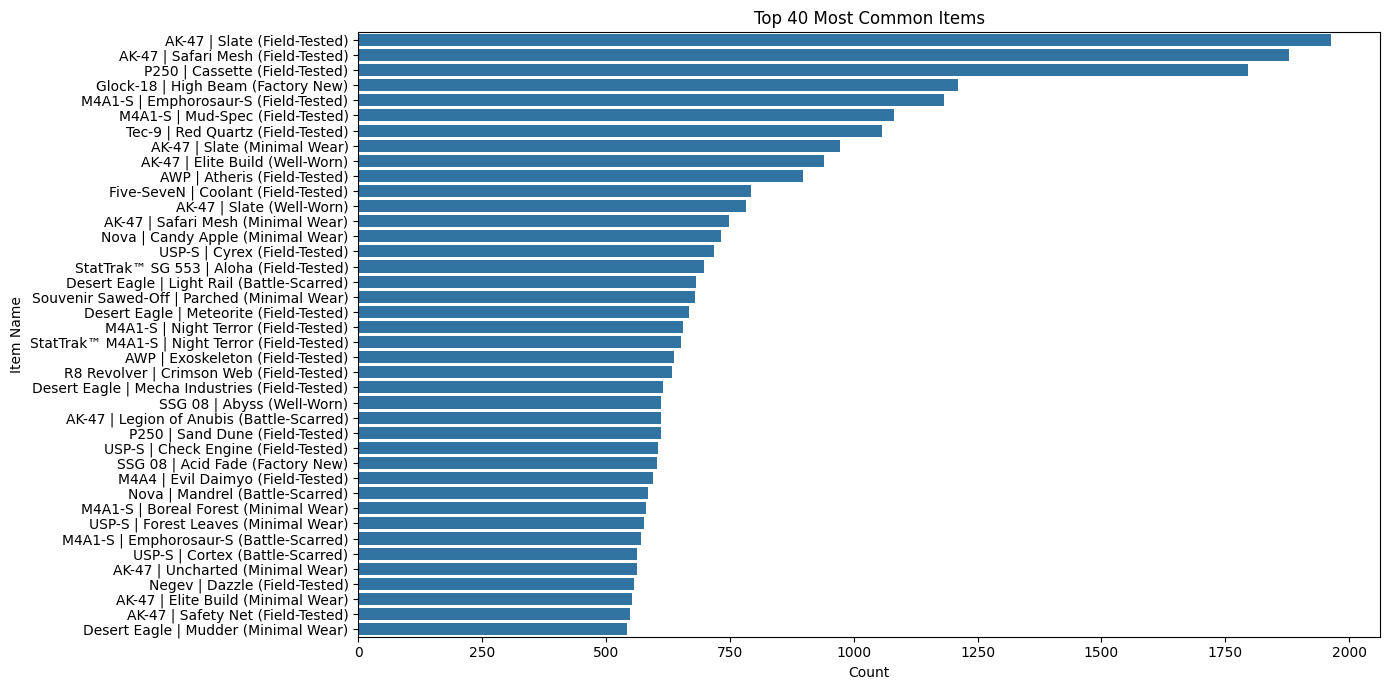

In [198]:
categorical_columns = ['type', 'market_hash_name']

for column in categorical_columns:
    print(f"Frequency distribution for {column}:")
    print(df_items[column].value_counts())
    print("\n")

fig, ax = plt.subplots(figsize=(14, 5))

sns.countplot(y=df_items['type'], ax=ax, order=df_items['type'].value_counts().index)
ax.set_title('Frequency Distribution of `type`')
ax.set_xlabel('Count')
ax.set_ylabel('type')




top_40_items = df_items['market_hash_name'].value_counts().head(40)

fig, ax = plt.subplots(figsize=(14, 7))

sns.barplot(x=top_40_items.values, y=top_40_items.index, ax=ax)
ax.set_title('Top 40 Most Common Items')
ax.set_xlabel('Count')
ax.set_ylabel('Item Name')


plt.tight_layout()
plt.show()

We skipped most of the values in a categorical feature of `market_hash_name` because, as we saw in the previous analysis, there are over 20k unique values. We plotted the top items by frequency so there is somewhat of an understanding when it comes to data frequency distribution.

### Step 8: Analysis of numerical features

In [199]:
numerical_stats = df_items[numerical_columns].describe().T

numerical_stats['median'] = df_items[numerical_columns].median()

numerical_stats['std'] = df_items[numerical_columns].std()

numerical_stats

,count,mean,std,min,25%,50%,75%,max,median
float,343201.0,0.307622,0.208740,0.000009,0.134552,0.273722,0.424141,0.999978,0.273722
price,343201.0,33.326746,998.958196,0.006000,0.208000,1.089000,5.454000,104356.835000,1.089000
avg_price,343201.0,17.518809,86.993252,0.030000,0.150000,0.910000,4.750000,1973.950000,0.910000



1. **`float`**: 
   - **Skewed right** with most values below 0.5 and a few high outliers. Mean (0.31) and median (0.27) are close, indicating moderate skewness.

2. **`price`**:
   - **Highly right-skewed** with most values near zero and extreme outliers. Mean (33.33) is much higher than the median (1.09) due to high-value items.

3. **`avg_price`**:
   - **Similar to `price`**, heavily right-skewed. Mean (17.52) is much higher than the median (0.91), reflecting a few expensive outliers.

All three features are right-skewed, with `price` and `avg_price` showing extreme skew due to high-value outliers.

### Step 9: Correlation analysis

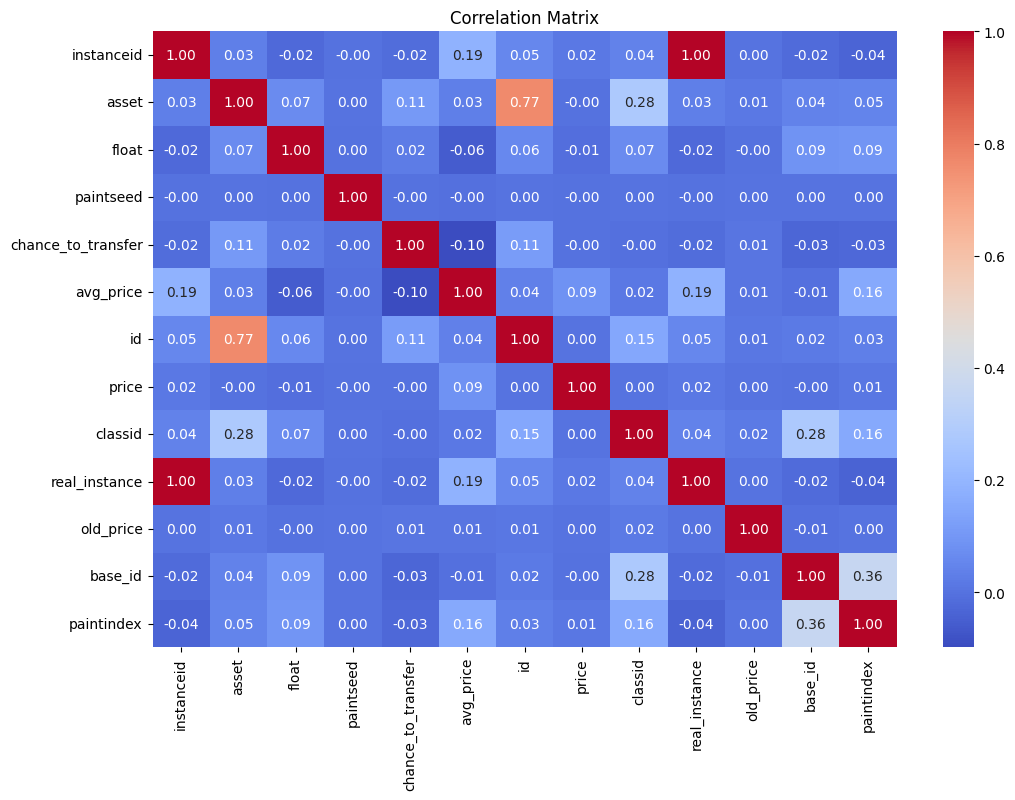

In [200]:
numeric_df_items = df_items.select_dtypes(include=[float, int])
correlation_matrix = numeric_df_items.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1. **`paintindex` as a Proxy for Visual Uniqueness**:
   - `paintindex`, which might represent unique visual patterns or skins, has a weak positive correlation with `avg_price` (0.159). This suggests that visually unique items tend to have slightly higher average prices, similar to how rare or desirable stickers might increase an item's value.
   - For `price`, the correlation is very low (0.012), indicating minimal impact on the immediate listing price, though unique appearances could influence longer-term pricing averages.

2. **`float` (Condition)**:
   - `float`, representing the wear level of an item, has a weak negative correlation with both `price` and `avg_price`. Items in better condition (lower `float` values) tend to have slightly higher prices. Stickers might also similarly enhance perceived quality, though this effect is minor in the given data.


### Step 10: Outliers Analysis

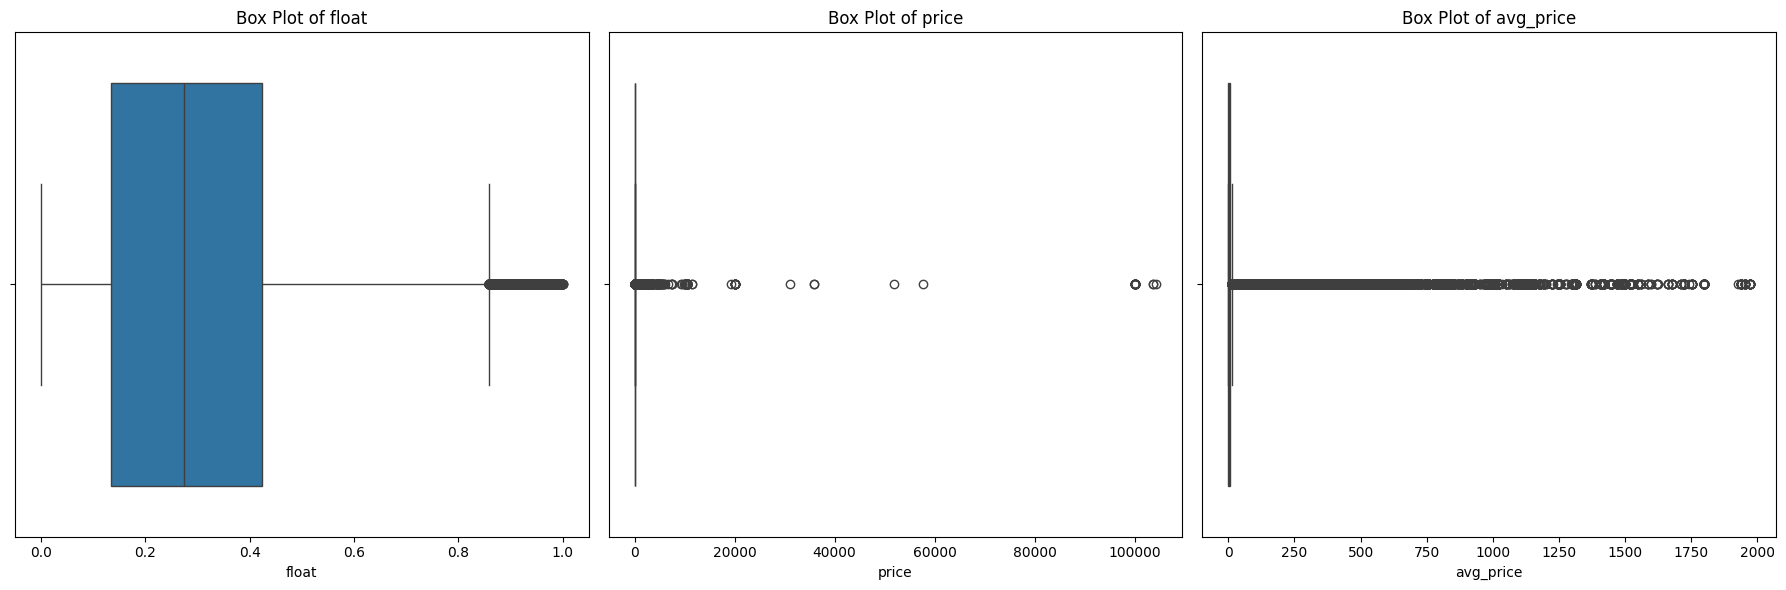

Количество выбросов в каждом столбце:
float         6372
price        50967
avg_price    48854
dtype: int64
Размер данных до удаления выбросов: (343201, 18)
Размер данных после удаления выбросов: (282335, 18)


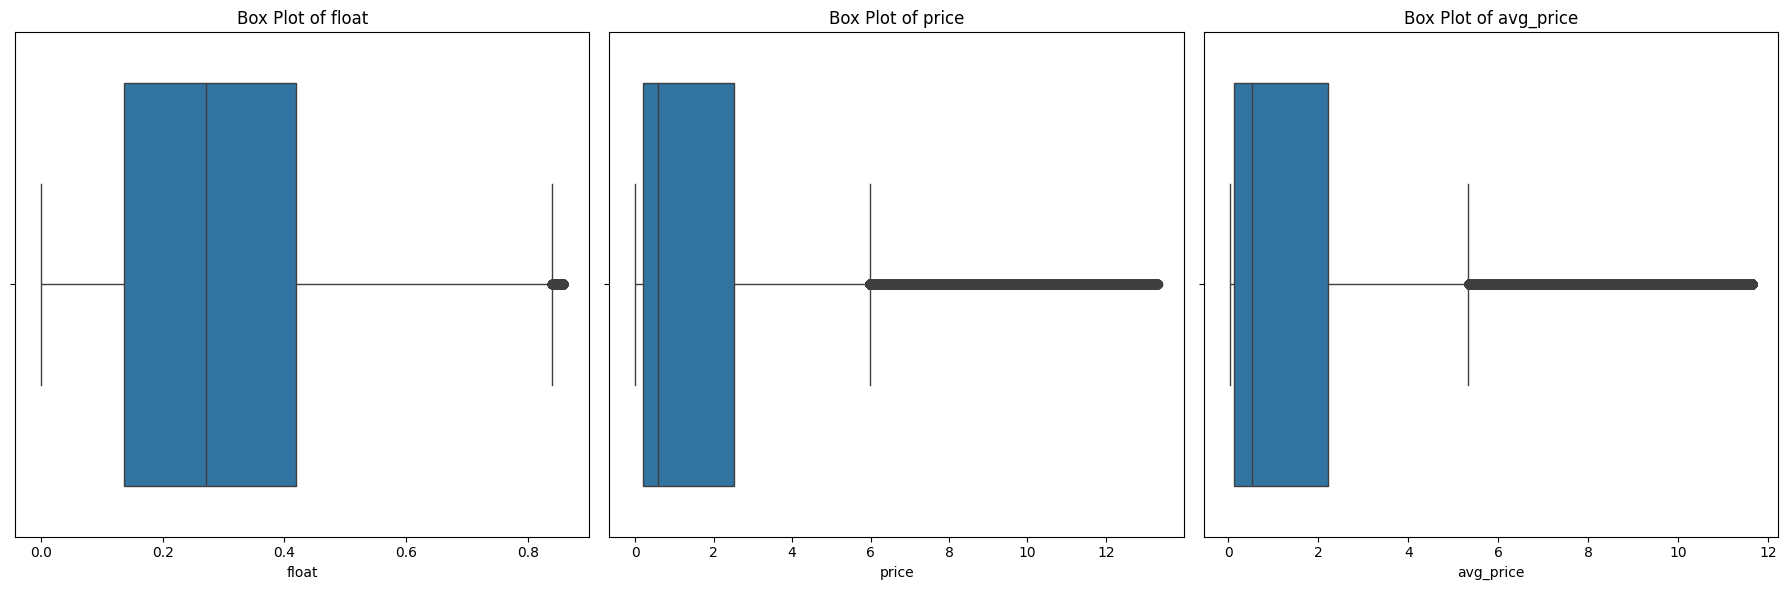

In [201]:
# Визуализация выбросов с помощью boxplot для числовых столбцов
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(18, 6))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_items[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

# Расчет межквартильного размаха (IQR) для каждого числового столбца
Q1 = df_items[numerical_columns].quantile(0.25)
Q3 = df_items[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов
outliers = ((df_items[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_items[numerical_columns] > (Q3 + 1.5 * IQR)))

# Подсчет количества выбросов в каждом столбце
outliers_count = outliers.sum()
print("Количество выбросов в каждом столбце:")
print(outliers_count)

# Удаление выбросов
df_items_no_outliers = df_items[~((df_items[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_items[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Проверка размерности данных до и после удаления выбросов
print(f"Размер данных до удаления выбросов: {df_items.shape}")
print(f"Размер данных после удаления выбросов: {df_items_no_outliers.shape}")

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(18, 6))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_items_no_outliers[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

### Step 11: Feature transformation

C:\Users\user\AppData\Local\Temp\ipykernel_2408\593493243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['log_price'] = np.log1p(df_items['price'])
C:\Users\user\AppData\Local\Temp\ipykernel_2408\593493243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['log_avg_price'] = np.log1p(df_items['avg_price'])


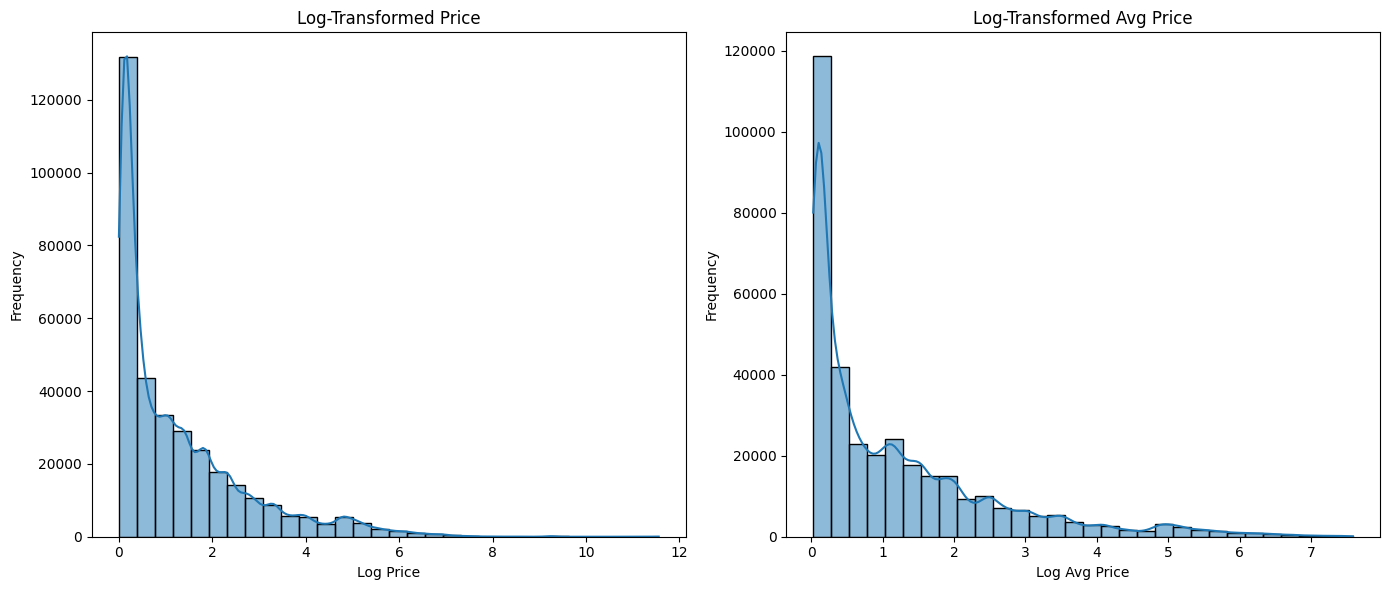

In [202]:
df_items['log_price'] = np.log1p(df_items['price'])
df_items['log_avg_price'] = np.log1p(df_items['avg_price'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.histplot(df_items['log_price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Log-Transformed Price')
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df_items['log_avg_price'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Avg Price')
axes[1].set_xlabel('Log Avg Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

---
As we saw in the previous analysis non of the encoding methods would benefit(OHE - would increase the dimensionality of the table drastically; Label Encoder - our categorical features are not represetned as heirarchy of any sort), so lets skip to another step.

### Step 12: Scaling of numeric features

To bring the features to the same scale, we will use robust standardisation. Robust standardisation involves transforming the data so that it is scaled according to the median and the interquartile range (IQR). This is particularly useful for features that have a large standard deviation and are prone to outliers, as in the case of `price` which has a `std of >899000`!

In [203]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_items['price_standardized'] = scaler.fit_transform(df_items[['price']])

df_items[['price', 'price_standardized']].describe()


C:\Users\user\AppData\Local\Temp\ipykernel_2408\3097538293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['price_standardized'] = scaler.fit_transform(df_items[['price']])


,price,price_standardized
count,343201.000000,343201.000000
mean,33.326746,6.145205
std,998.958196,190.422836
min,0.006000,-0.206443
25%,0.208000,-0.167937
50%,1.089000,0.000000
75%,5.454000,0.832063
max,104356.835000,19892.441098


The `price` attribute is now standardised and brought to the same scale as other attributes.

### Step 13: Feature engineering

The feature sticker is a categorical feature(string) that cosists of sticker id's seperated by "`|`". We have a seperate dataset (*sticker.csv*) that conists of mapping of sticker_id to market_hash_name and its avg_price. We'll load it and try to create a new feature that would be called `sum_of_sticker_prices`. The name expains itself.

#### Firstly, lets load the dataset

Lets perform a brief analysis of the dataset.


In [204]:
df_stiickers = pd.read_csv(PATH_TO_DATA + "sticker.csv", low_memory=False)
df_stiickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3056 non-null   int64  
 1   market_hash_name  3056 non-null   object 
 2   avg_price         3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB


As we can see no data gaps are found. Thats because we verified integrity of the dataset beforehand in the db.

#### Secondly, we need to write a function to parse the sticker ids, create a new feauture and to map it with the corresponding values in the sticker dataset.

In [205]:
def get_avg_sticker_price(sticker_ids, df_stickers):
	if pd.isna(sticker_ids):
		return 0
	ids = sticker_ids.split('|')
	prices = df_stickers[df_stickers['id'].isin(map(int, ids))]['avg_price']
	return prices.sum() if not prices.empty else 0

df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)
df_items.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2408\665571864.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['sum_sticker_price'] = df_items['stickers'].apply(get_avg_sticker_price, df_stickers=df_stiickers)


,instanceid,asset,stamp,float,paintseed,stickers,chance_to_transfer,avg_price,id,market_hash_name,...,real_instance,old_price,base_id,phase,paintindex,type,log_price,log_avg_price,price_standardized,sum_sticker_price
25,188530139,40110184847,2024-10-30 12:26:47,0.217917,746.0,18269360690|9151142199|18271767885|18384359800,70.0,2.31,5855908503,Souvenir AUG | Sand Storm (Field-Tested),...,188530139,0.0,86838,NaN,823.0,Rifle,1.219945,1.196948,0.247427,3.24
27,902658099,34959445177,2024-10-30 12:26:47,0.127193,490.0,12750092503,95.0,5.81,5855908607,StatTrak™ M4A1-S | Flashback (Minimal Wear),...,902658099,0.0,2821,NaN,631.0,Rifle,1.921617,1.918392,0.904117,0.00
32,188530139,40110231107,2024-10-30 12:26:47,0.189969,483.0,NaN,70.0,2.31,5855908703,Souvenir AUG | Sand Storm (Field-Tested),...,188530139,0.0,86838,NaN,823.0,Rifle,1.219945,1.196948,0.247427,0.00
33,480085569,40099804104,2024-10-30 11:55:48,0.064586,311.0,2128113150|28004,95.0,8.87,5855908711,AWP | Mortis (Factory New),...,480085569,7024.0,4324,NaN,691.0,Sniper Rifle,2.070022,2.289500,1.112467,0.05
39,188530139,40099824882,2024-10-30 12:00:28,0.329627,295.0,NaN,95.0,4.74,5855908831,Glock-18 | Water Elemental (Field-Tested),...,188530139,3888.0,572,NaN,353.0,Pistol,1.588010,1.747459,0.534693,0.00


It took a while because of the size of the datasets and lack of hash indexies. Nevertheless, we got our new feature called `sum_of_stickers`!

### Step 14: Removal of irrelevant features

The id is a unique value that is composite of classid, asset, instanceid, base_id and real_instance, so there is no need to keep them all afterall. We could reindex the df making the id field prime index later on.

In [206]:
columns_to_drop = ["classid", "instanceid", "base_id", "real_instance", "asset"]
df_items = df_items.drop(columns=[col for col in columns_to_drop if col in df_items.columns])
df_items.head(1)

,stamp,float,paintseed,stickers,chance_to_transfer,avg_price,id,market_hash_name,price,old_price,phase,paintindex,type,log_price,log_avg_price,price_standardized,sum_sticker_price
25,2024-10-30 12:26:47,0.217917,746.0,18269360690|9151142199|18271767885|18384359800,70.0,2.31,5855908503,Souvenir AUG | Sand Storm (Field-Tested),2.387,0.0,NaN,823.0,Rifle,1.219945,1.196948,0.247427,3.24


Perfect! Now the dimensionality of the dataset is reduced to 13 columns.

Few columns hold no relevance to our goal and can be excluded. These include:

1. `stamp`: when item was listed, which is not matter to our analysis as this is not time series;
2. `old_price`: this field only displays the previous price set by the user before any adjustments;
3. `chance_to_transfer`: this field provides information about the user who listed the item.

In [207]:
useless_fields = ['old_price', 'stamp', 'chance_to_transfer']
df_items.drop(columns=[col for col in useless_fields if col in df_items.columns], inplace=True)
df_items.head(1)

,float,paintseed,stickers,avg_price,id,market_hash_name,price,phase,paintindex,type,log_price,log_avg_price,price_standardized,sum_sticker_price
25,0.217917,746.0,18269360690|9151142199|18271767885|18384359800,2.31,5855908503,Souvenir AUG | Sand Storm (Field-Tested),2.387,NaN,823.0,Rifle,1.219945,1.196948,0.247427,3.24


Our goal is to see how **sticker prices** placed on item affect the **item's price**. The dataset is a listing that consists of all items avialable for purchase as of 24.10.2024.
Some items such as **`Sticker`(obvious one), `Knife`, `Gloves`, `Agent`** cant have stickers placed on them, so lets filter them out.


In [208]:
df_items['type'].value_counts()


type
Pistol          119531
Rifle            96781
SMG              51719
Sniper Rifle     34520
Shotgun          22703
Knife             8549
Machinegun        7407
Gloves            1987
Sticker              2
Graffiti             2
Name: count, dtype: int64

In [209]:
types_to_delete = ['Knife', 'Gloves', 'Agent', 'Sticker', 'Container', 'Graffiti', 'Music Kit',
                    'Patch', 'Tag', 'Key', 'Pass', 'Collectible', 'Charm', 'Equipment', 'Tool', 'Gift']
df_items.drop(df_items[df_items['type'].isin(types_to_delete)].index, inplace=True)
df_items['type'].value_counts()


type
Pistol          119531
Rifle            96781
SMG              51719
Sniper Rifle     34520
Shotgun          22703
Machinegun        7407
Name: count, dtype: int64

There are very few items with phase. It is known that phase do indeed affect the price, so lets remove the items with the `phase` value that is not NaN. Afterwards lets drop the useless column.

In [210]:
df_items = df_items[df_items['phase'].isna()]

df_items = df_items.drop(columns=['phase'])

df_items.head()

,float,paintseed,stickers,avg_price,id,market_hash_name,price,paintindex,type,log_price,log_avg_price,price_standardized,sum_sticker_price
25,0.217917,746.0,18269360690|9151142199|18271767885|18384359800,2.31,5855908503,Souvenir AUG | Sand Storm (Field-Tested),2.387,823.0,Rifle,1.219945,1.196948,0.247427,3.24
27,0.127193,490.0,12750092503,5.81,5855908607,StatTrak™ M4A1-S | Flashback (Minimal Wear),5.832,631.0,Rifle,1.921617,1.918392,0.904117,0.00
32,0.189969,483.0,NaN,2.31,5855908703,Souvenir AUG | Sand Storm (Field-Tested),2.387,823.0,Rifle,1.219945,1.196948,0.247427,0.00
33,0.064586,311.0,2128113150|28004,8.87,5855908711,AWP | Mortis (Factory New),6.925,691.0,Sniper Rifle,2.070022,2.289500,1.112467,0.05
39,0.329627,295.0,NaN,4.74,5855908831,Glock-18 | Water Elemental (Field-Tested),3.894,353.0,Pistol,1.588010,1.747459,0.534693,0.00


Also, the paintindex in comination with paintseed do affect price, but only in very rare instances. We could remove the said features.

In [211]:
df_items = df_items.drop(columns=['paintseed', 'paintindex'])

Awesome! Now we have a clean dataset with only the necessary columns. Let's move on to the next step: data analysis and visualization. We will create some plots to explore the relationships between different variables in the dataset.

### Step 15: Data visualization

#### Analyzing the relation of sticker price on skin and price of a listing

In [212]:
df_items.head(5)

,float,stickers,avg_price,id,market_hash_name,price,type,log_price,log_avg_price,price_standardized,sum_sticker_price
25,0.217917,18269360690|9151142199|18271767885|18384359800,2.31,5855908503,Souvenir AUG | Sand Storm (Field-Tested),2.387,Rifle,1.219945,1.196948,0.247427,3.24
27,0.127193,12750092503,5.81,5855908607,StatTrak™ M4A1-S | Flashback (Minimal Wear),5.832,Rifle,1.921617,1.918392,0.904117,0.00
32,0.189969,NaN,2.31,5855908703,Souvenir AUG | Sand Storm (Field-Tested),2.387,Rifle,1.219945,1.196948,0.247427,0.00
33,0.064586,2128113150|28004,8.87,5855908711,AWP | Mortis (Factory New),6.925,Sniper Rifle,2.070022,2.289500,1.112467,0.05
39,0.329627,NaN,4.74,5855908831,Glock-18 | Water Elemental (Field-Tested),3.894,Pistol,1.588010,1.747459,0.534693,0.00


To remove data anomalies we will keep only items where the sum of the "sticker" price and 1.5 * average price is greater than or equal to the actual price. This helps filter for items 
with a justified price.

In [213]:
df_items_no_out = df_items[(df_items['sum_sticker_price'] + df_items['avg_price']*1.5) >= (df_items['price'])]
df_items_no_out

,float,stickers,avg_price,id,market_hash_name,price,type,log_price,log_avg_price,price_standardized,sum_sticker_price
25,0.217917,18269360690|9151142199|18271767885|18384359800,2.31,5855908503,Souvenir AUG | Sand Storm (Field-Tested),2.387,Rifle,1.219945,1.196948,0.247427,3.24
27,0.127193,12750092503,5.81,5855908607,StatTrak™ M4A1-S | Flashback (Minimal Wear),5.832,Rifle,1.921617,1.918392,0.904117,0.00
32,0.189969,NaN,2.31,5855908703,Souvenir AUG | Sand Storm (Field-Tested),2.387,Rifle,1.219945,1.196948,0.247427,0.00
33,0.064586,2128113150|28004,8.87,5855908711,AWP | Mortis (Factory New),6.925,Sniper Rifle,2.070022,2.289500,1.112467,0.05
39,0.329627,NaN,4.74,5855908831,Glock-18 | Water Elemental (Field-Tested),3.894,Pistol,1.588010,1.747459,0.534693,0.00
...,...,...,...,...,...,...,...,...,...,...,...
742442,0.133974,NaN,0.18,5858887807,MAG-7 | Popdog (Minimal Wear),0.135,Shotgun,0.126633,0.165514,-0.181853,0.00
742444,0.162955,NaN,7.63,5858887823,FAMAS | Commemoration (Field-Tested),8.508,Rifle,2.252134,2.155245,1.414220,0.00
742445,0.197408,1827462841,2.08,5858887831,StatTrak™ USP-S | Torque (Field-Tested),3.090,Pistol,1.408545,1.124930,0.381433,0.00
742446,0.091549,NaN,0.03,5858887839,Nova | Mandrel (Minimal Wear),0.040,Shotgun,0.039221,0.029559,-0.199962,0.00


Filter items with a `sum_sticker_price` price between 0 and 10,000 and calculate `overpay` as the difference between actual and average price; plot `overpay` versus `sum_sticker_price` for items with positive `overpay` and add a trendline for visualization.

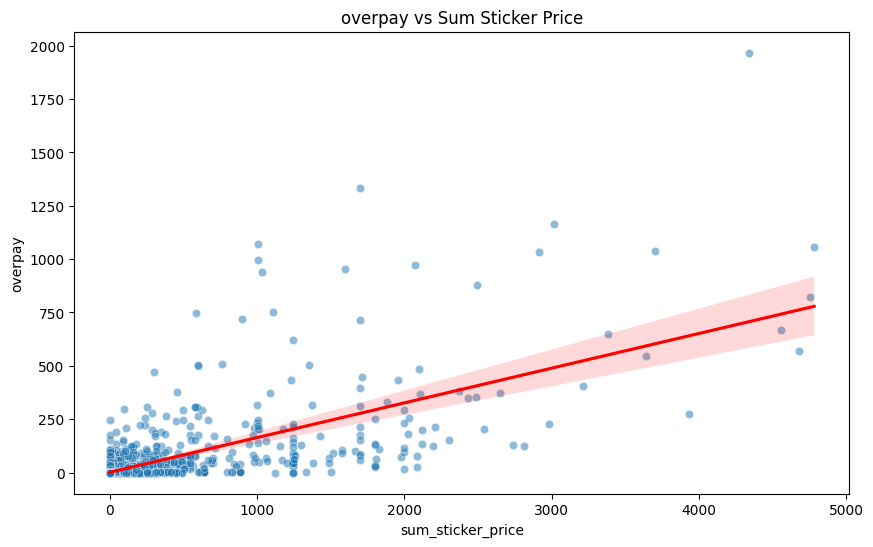

In [215]:
df_items_no_out_filtered = df_items_no_out[(df_items_no_out['sum_sticker_price'] > 0) & (df_items_no_out['sum_sticker_price'] < 10000)].copy()
df_items_no_out_filtered['overpay'] = df_items_no_out_filtered['price'] - df_items_no_out_filtered['avg_price']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_sticker_price', y='overpay', data=df_items_no_out_filtered[df_items_no_out_filtered['overpay'] >= 0], alpha=0.5)
plt.xlabel('Sum Sticker Price')
plt.ylabel('overpay')
plt.title('overpay vs Sum Sticker Price')
# Add a trendline
sns.regplot(x='sum_sticker_price', y='overpay', data=df_items_no_out_filtered[df_items_no_out_filtered['overpay'] >= 0], scatter=False, color='red')
plt.show()


Good, we can see how our theory about increasing overpay based on sticker price is holding up.

Let’s create plots to analyze the relationship between the price and the total sticker cost for the 12 most popular items with stickers. This visualization will show how an item's price may depend on the cost of the stickers applied to it, which can help identify trends in the popularity of stickered items and their price dynamics.


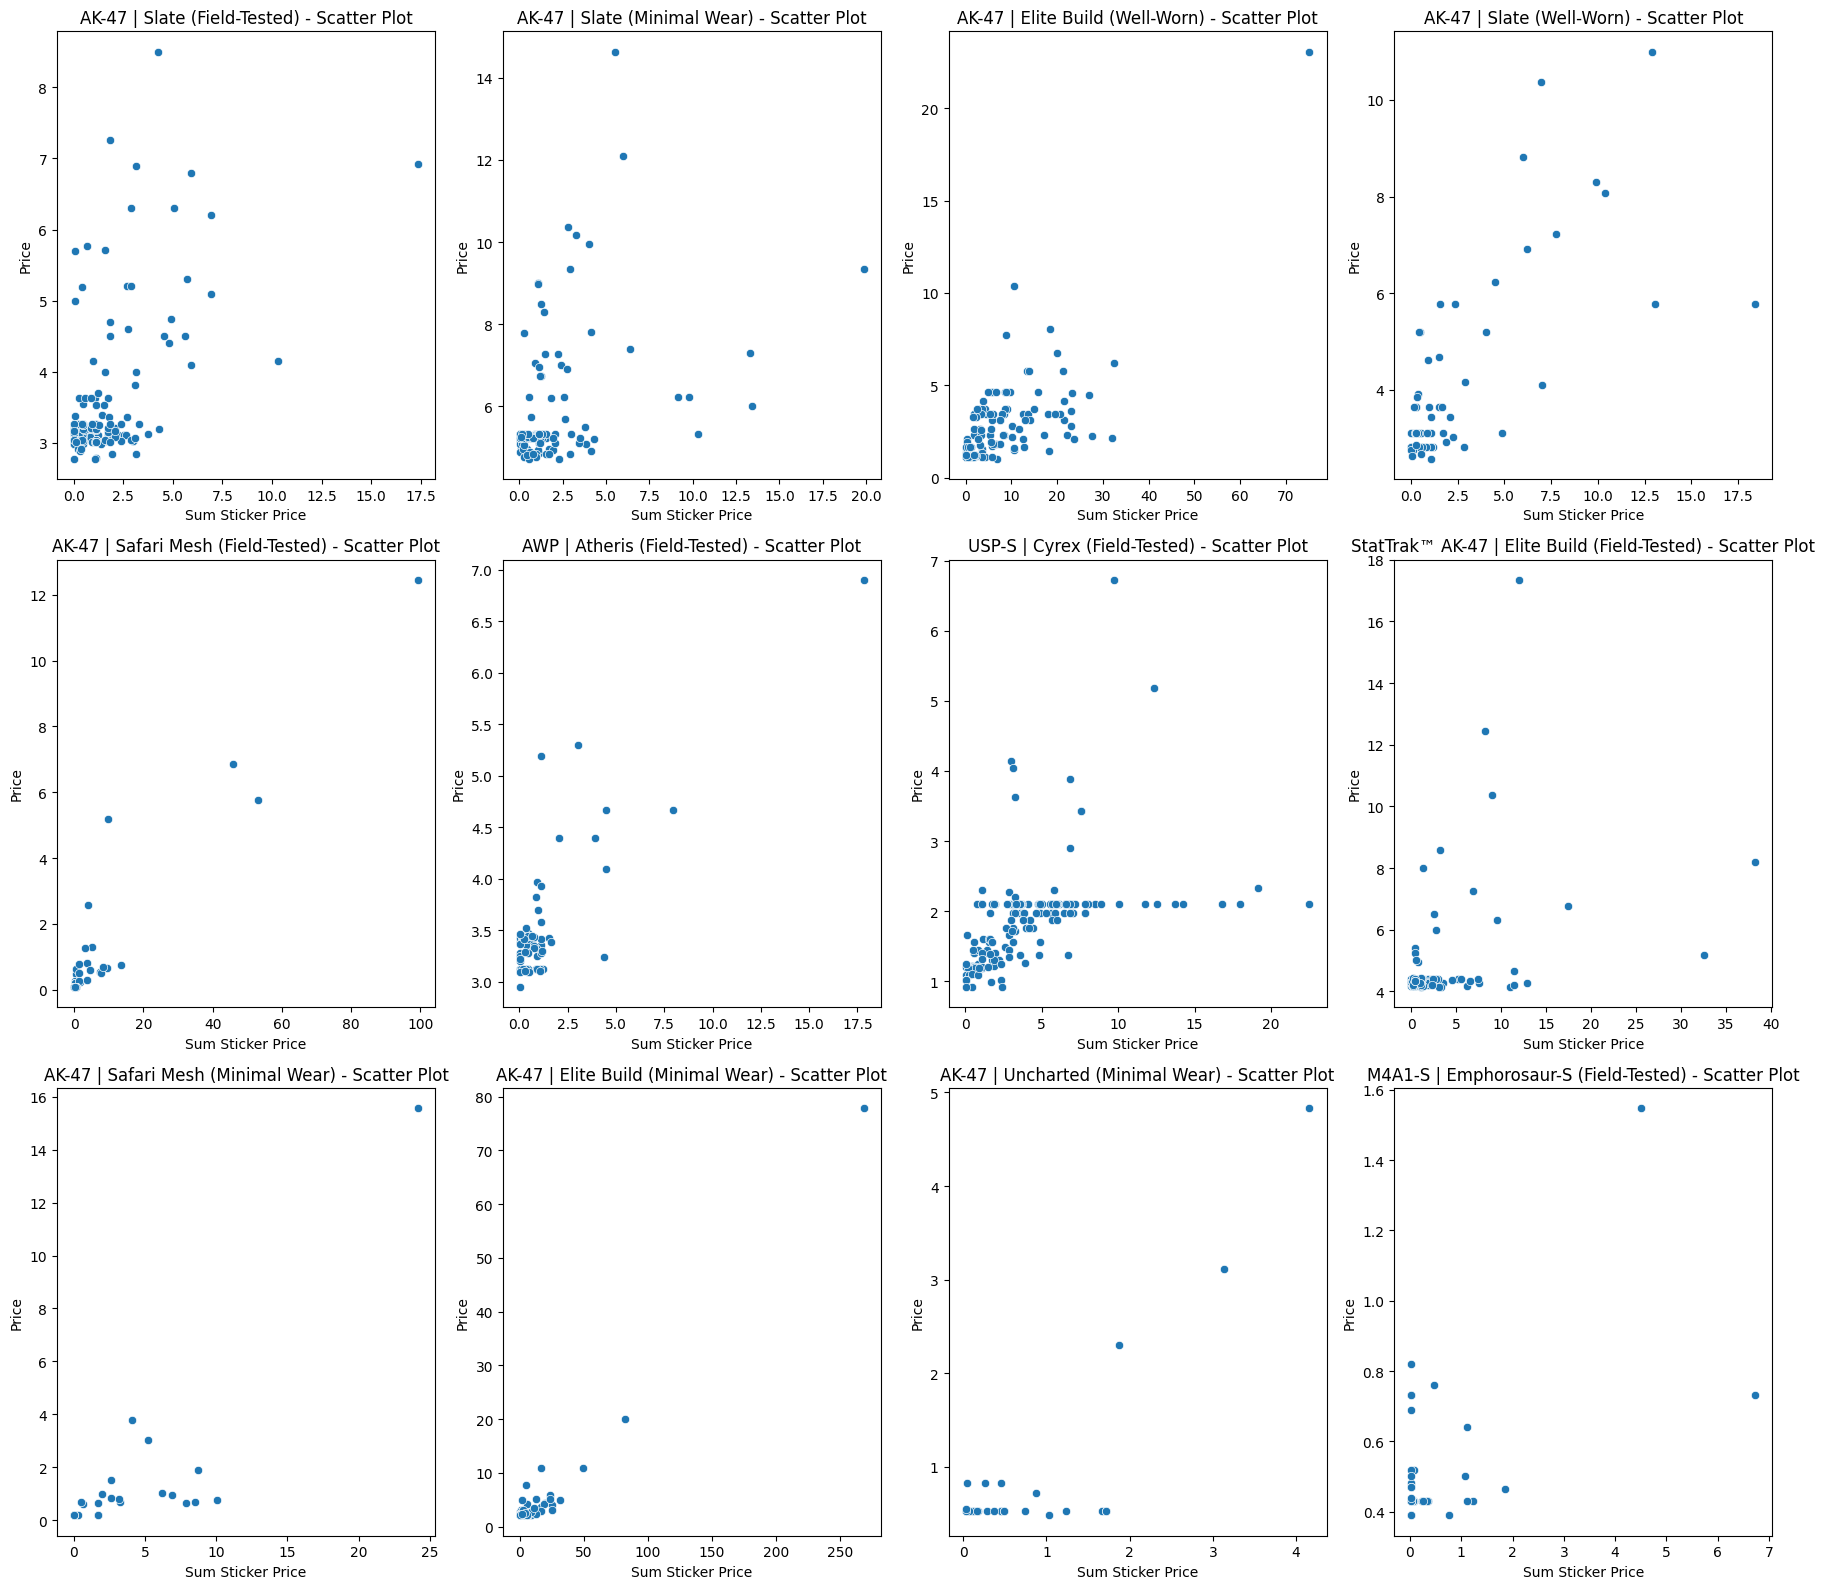

In [216]:
top_12_popular_names_with_stickers = df_items_no_out[df_items_no_out['stickers'].notna() & ~(df_items_no_out['market_hash_name'].str.contains("Souvenir"))]['market_hash_name'].value_counts().head(12).index
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 16))
axes = axes.flatten()

for i, item in enumerate(top_12_popular_names_with_stickers):
    item_data = df_items_no_out[df_items_no_out['market_hash_name'] == item]
    item_data = item_data[item_data['sum_sticker_price'] > 0]
    
    sns.scatterplot(x='sum_sticker_price', y='price', data=item_data, ax=axes[i])
    axes[i].set_title(f'{item} - Scatter Plot')
    axes[i].set_xlabel('Sum Sticker Price')
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

As you can see, overall, `stickers tend to increase` the price of the items.

Now we will create barplot with average price for all items, comparing those with stickers to those without, including only items that are present in the dataset both with and without stickers. 

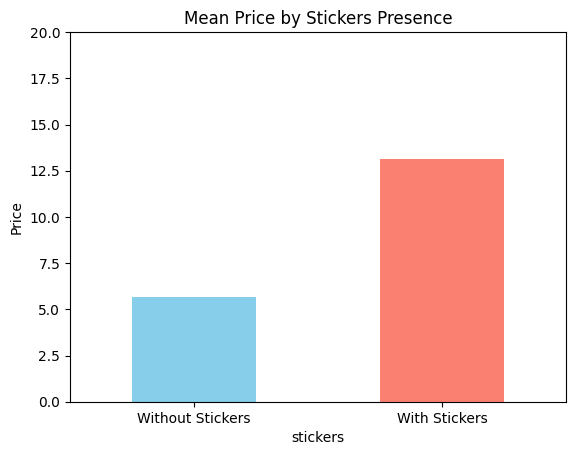

In [217]:
items_filtered_without_stickers = df_items_no_out[df_items_no_out['stickers'].isna()]['market_hash_name'].unique()
items_filtered_with_stickers = df_items_no_out[df_items_no_out['stickers'].notna()]['market_hash_name'].unique()

df_filtered = df_items_no_out[df_items_no_out['market_hash_name'].isin(items_filtered_without_stickers) & df_items_no_out['market_hash_name'].isin(items_filtered_with_stickers)].copy()

avg_price_by_sticker = df_filtered.groupby(df_filtered['stickers'].notna())['price'].mean()

avg_price_by_sticker.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Without Stickers', 'With Stickers'], rotation=0)
plt.ylabel('Price')
plt.title('Mean Price by Stickers Presence')
plt.ylim(0,20) 
plt.show()

Items with stickers cost considerably more.

Let's see how many items we have with and without stickers:

In [218]:
items_with_stickers = df_items_no_out['stickers'].notna().sum()
items_without_stickers = df_items_no_out['stickers'].isna().sum()

print(f"Items with stickers: {items_with_stickers}")
print(f"Items without stickers: {items_without_stickers}")

Items with stickers: 86599
Items without stickers: 175651


There are twice as few items without stickers on sale.

Let's take a closer look at a particular item called `AK-47 | Slate (Field-Tested)`. It is one of the most popular items in the dataset and is one of the most popular items for placing stickers. We can further examine the effect of sticker price on the item on this item.

In [219]:
item_to_selecet = "AK-47 | Slate (Field-Tested)"
ak47_slate = df_items_no_out[df_items_no_out['market_hash_name'] == item_to_selecet]
ak47_slate_with_stickers = ak47_slate[ak47_slate['stickers'].notna()].shape[0]
ak47_slate_without_stickers = ak47_slate[ak47_slate['stickers'].isna()].shape[0]
print(f'{item_to_selecet} with stickers: {ak47_slate_with_stickers}\n{item_to_selecet} without stickers: {ak47_slate_without_stickers}')

AK-47 | Slate (Field-Tested) with stickers: 1438
AK-47 | Slate (Field-Tested) without stickers: 238


There are more items with stickers and they're more expensive.

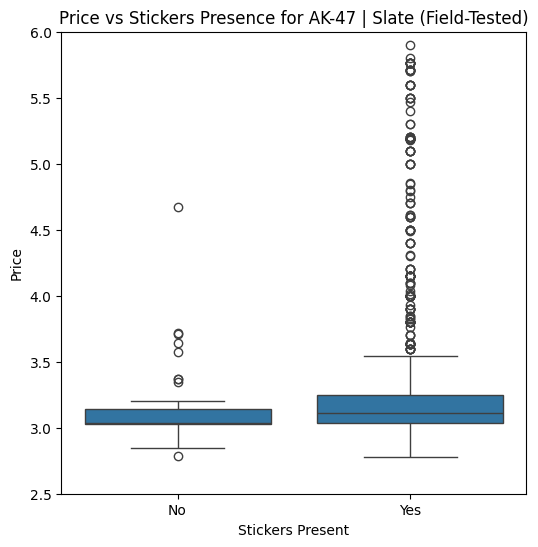

In [220]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=ak47_slate['stickers'].notna(), y='price', data=ak47_slate)
plt.title('Price vs Stickers Presence for AK-47 | Slate (Field-Tested)')
plt.xlabel('Stickers Present')
plt.ylabel('Price')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(2.5, 6)
plt.show()

As we can see, the IQRs of both No and Yes are somewhat the same, meaning that the most stickers do not boost the item's cost, but as we can see on the max marks and the amount of outliers, we can assume that some stickers do affect the cost. The median line also suggests that the price is affected in a way.

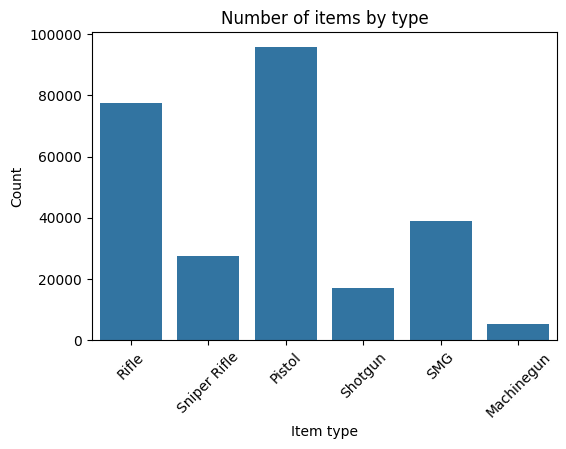

In [224]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df_items_no_out)
plt.title('Number of items by type')
plt.xlabel('Item type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Pistols and rifles are the most common item types, followed by SMGs and sniper rifles with moderate counts. Shotguns and machineguns are the least common, indicating lower availability or demand in the dataset.

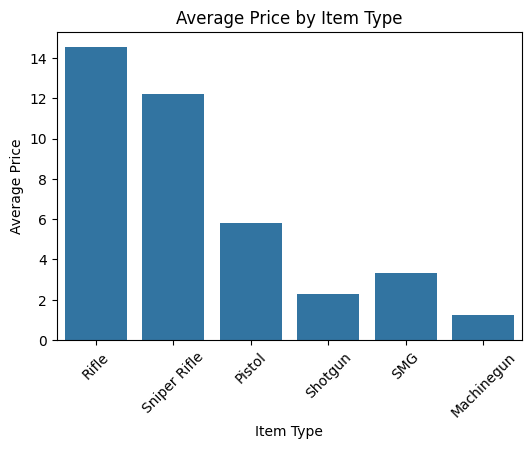

In [225]:
plt.figure(figsize=(6, 4))
sns.barplot(x='type', y='avg_price', data=df_items_no_out, errorbar=None)
plt.title('Average Price by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Rifles and sniper rifles have the highest average prices, followed by pistols at a moderate price level. Shotguns, SMGs, and machineguns are the least expensive, suggesting that rifles and sniper rifles are more valued in this dataset.

### Analyzing how other features might affect price

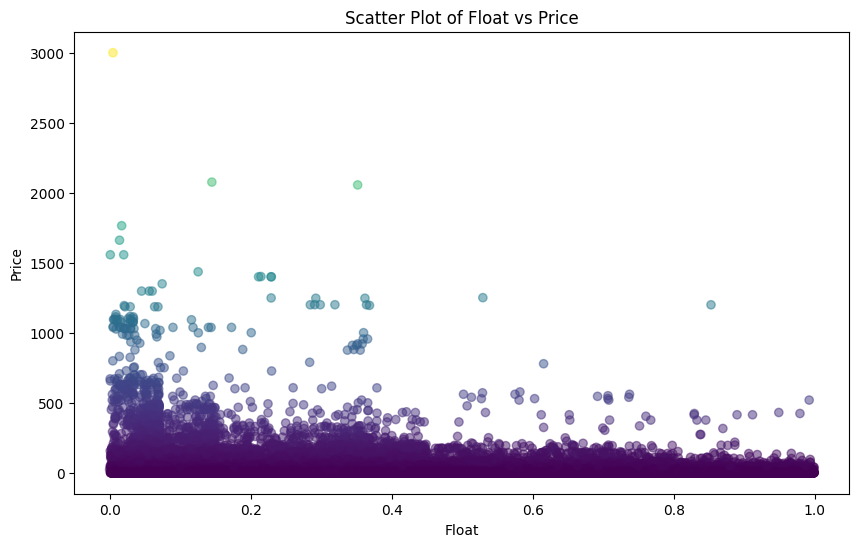

In [259]:
df_with_overpay = df_items_no_out.copy()
df_with_overpay['overpay'] = df_with_overpay['price'] / df_with_overpay['avg_price']

plt.figure(figsize=(10, 6))
plt.scatter(df_with_overpay['float'], df_with_overpay['price'], c=df_with_overpay['price'], cmap='viridis', alpha=0.5)
plt.xlabel('Float')
plt.ylabel('Price')
plt.title('Scatter Plot of Float vs Price')
plt.show()

The scatter plot of float vs price shows that most items with low float values (indicating better condition) have higher prices, though there is a wide spread. A few high-priced outliers exist, especially at low float values, suggesting that items in better condition tend to be more valuable but with some variability in pricing.


Lets take a closer look at different ranges.

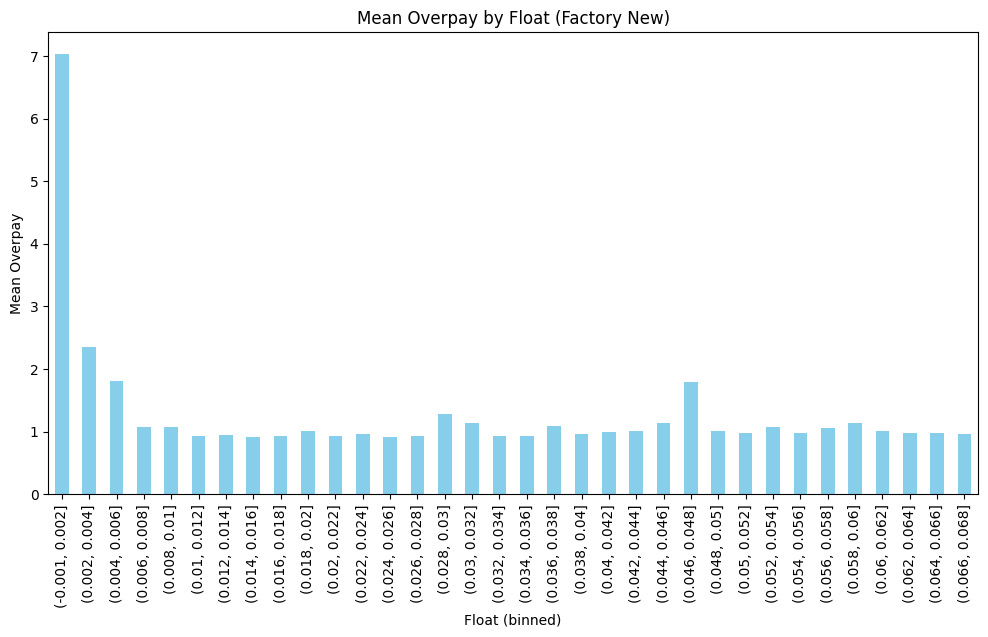

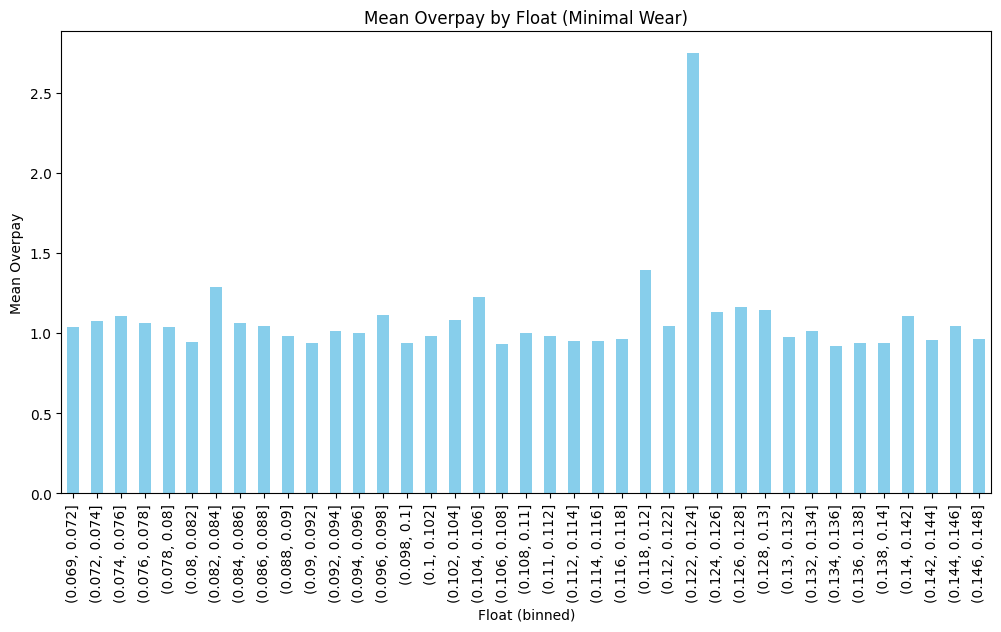

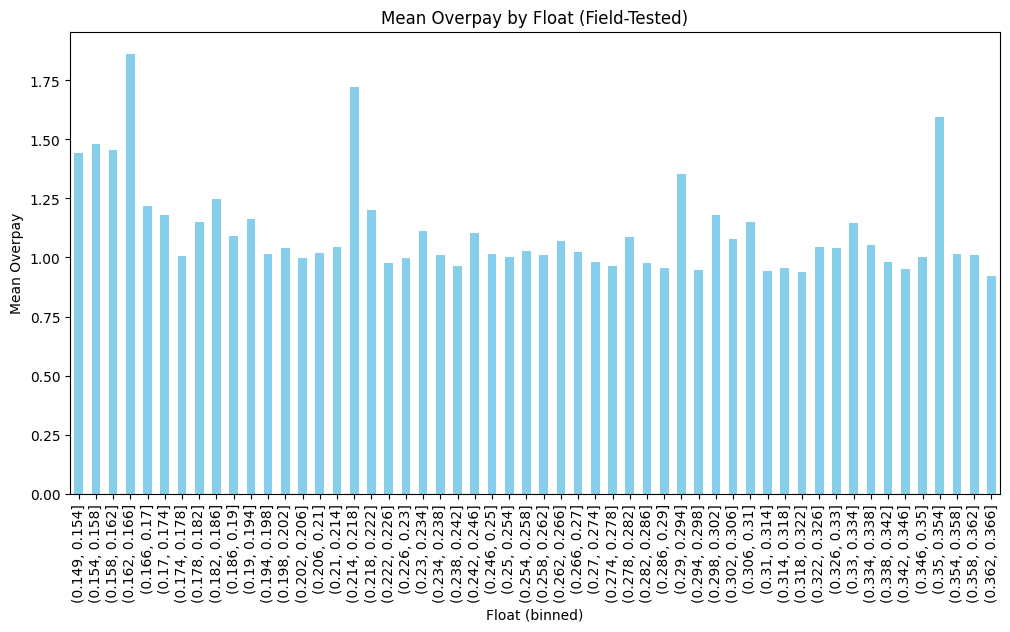

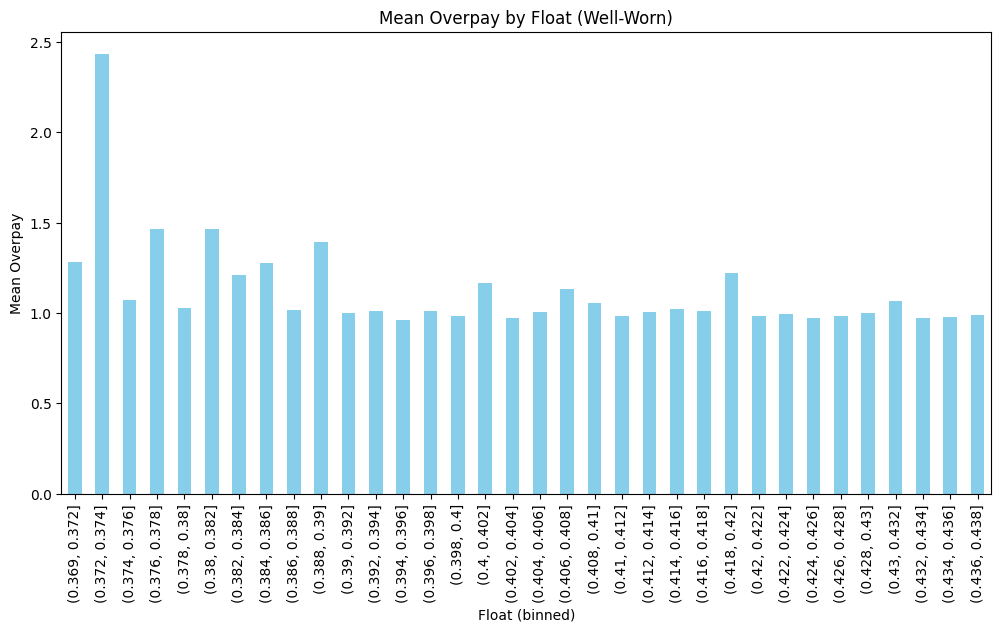

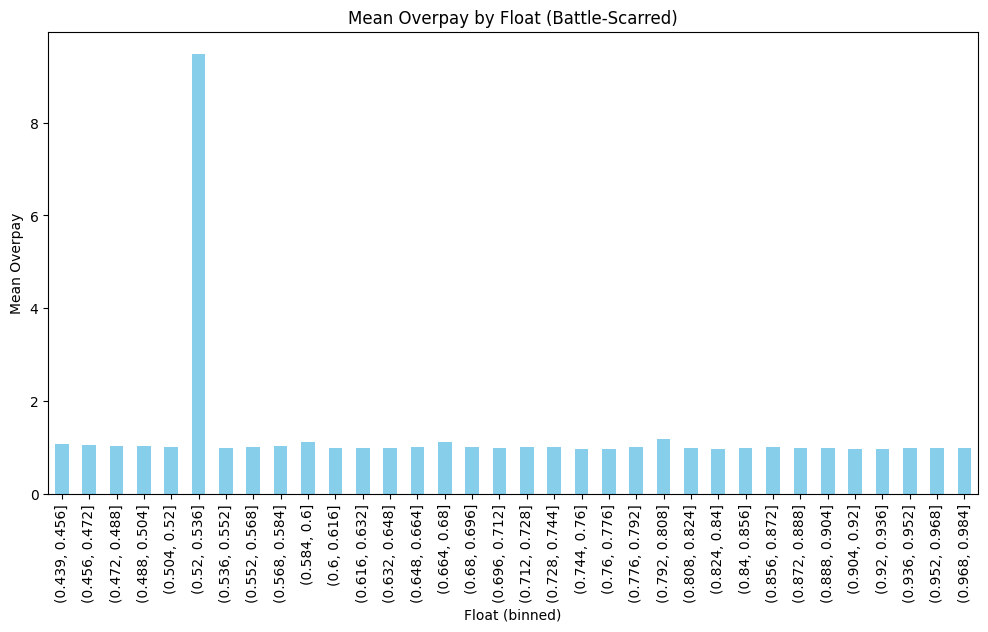

In [260]:
ranges = {
    'Factory New': (0.00, 0.07, 0.002),
    'Minimal Wear': (0.07, 0.15, 0.002),
    'Field-Tested': (0.15, 0.37, 0.004),
    'Well-Worn': (0.37, 0.44, 0.002),
    'Battle-Scarred': (0.44, 1.00, 0.016)
}

# Loop through each range and generate the plots
for label, (start, end, step) in ranges.items():
    bins = np.arange(start, end, step)
    df_with_overpay['float_bin'] = pd.cut(df_with_overpay['float'], bins, include_lowest=True)
    
    # Calculate the mean overpay for each bin
    mean_overpay_by_float_bin = df_with_overpay.groupby('float_bin', observed=True)['overpay'].mean()
    
    # Plot the bar graph
    plt.figure(figsize=(12, 6))
    mean_overpay_by_float_bin.plot(kind='bar', color='skyblue')
    plt.xlabel('Float (binned)')
    plt.ylabel('Mean Overpay')
    plt.title(f'Mean Overpay by Float ({label})')
    plt.show()

**Summary of Mean Overpay by Float (Condition-Based)**:

1. **Factory New**: Items with the lowest float values (closest to 0) have the highest overpay, with a steep drop-off as float increases. This suggests buyers pay significantly more for pristine, low-float items in "Factory New" condition.

2. **Minimal Wear**: Overpay is generally consistent across float ranges but shows occasional spikes, indicating that certain low-float items within "Minimal Wear" attract higher premiums.

3. **Field-Tested**: Overpay remains relatively steady, with mild fluctuations across float bins, suggesting less sensitivity to float in this condition.

4. **Well-Worn**: Shows minor variability in overpay, with a slight preference for lower float values but no strong trends.

5. **Battle-Scarred**: Overpay is mostly stable across float bins, except for a notable spike in one bin, which may indicate demand for rare, specific float values even in heavily worn items.

**Overall**: Lower float values, especially in pristine conditions like "Factory New," attract the highest overpay. As item condition worsens, the influence of float on overpay diminishes, although some rare float values in "Battle-Scarred" still command a premium.